### 1. Read the data from the h5py file and understand the train/test splits

**Import libraries**

In [1]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras import regularizers, optimizers

In [2]:
tensorflow.__version__

'2.6.0'

In [3]:
# open file
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [5]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape:   ', X_val.shape)
print('y_val shape:   ', y_val.shape)
print('X_test shape:  ', X_test.shape)
print('y_test shape:  ', y_test.shape)

X_train shape:  (42000, 32, 32)
y_train shape:  (42000,)
X_val shape:    (60000, 32, 32)
y_val shape:    (60000,)
X_test shape:   (18000, 32, 32)
y_test shape:   (18000,)


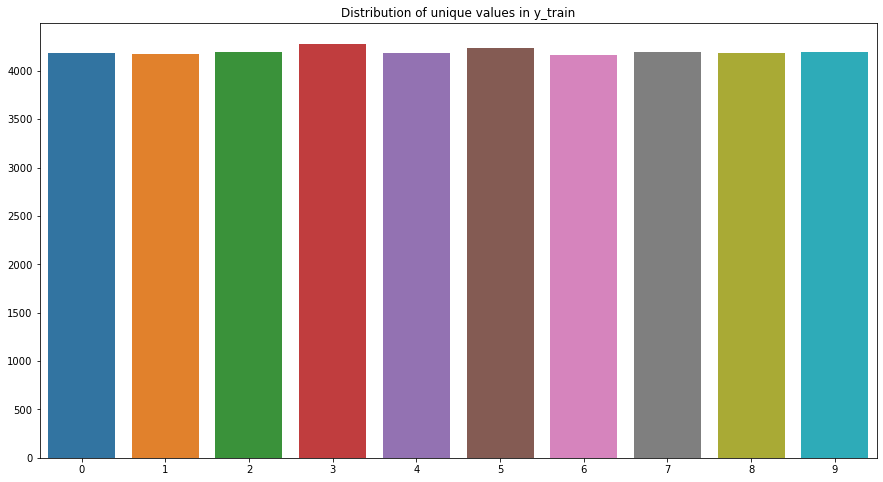

In [6]:
# find unique values and their quantity
unique , counts = np.unique(y_train, return_counts=True)

# plot distribution of unique values in y_train
plt.figure(figsize=(15,8))
plt.title('Distribution of unique values in y_train')
sns.barplot(x=unique, y=counts);

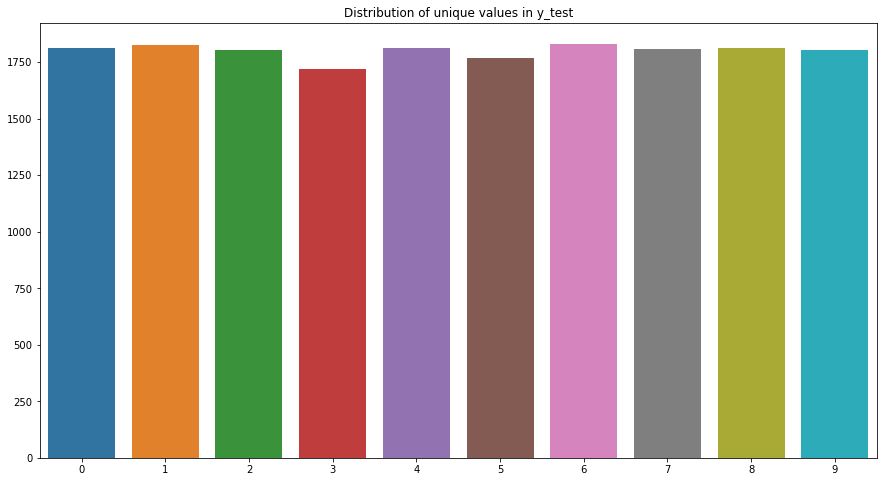

In [7]:
# find unique values and their quantity
unique , counts = np.unique(y_test, return_counts=True)

# plot distribution of unique values in y_test
plt.figure(figsize=(15,8))
plt.title('Distribution of unique values in y_test')
sns.barplot(x=unique, y=counts);

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


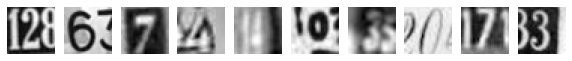

In [8]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (y_train[0:10][i]))
plt.show()

### 2. Reshape and normalize the train and test features so that the same can be fed for model building. We need to feed a 2D tensor into the model and currently we have a 3D tensor.

In [9]:
# reshape data from 3d to 2d (42000 x 32 x 32 to 42000 x 1024)
X_train = X_train.reshape(42000, 1024)
print('Shape of X_train : ', X_train.shape)

X_val = X_val.reshape(60000, 1024)
print('Shape of X_test  : ', X_val.shape)

X_test = X_test.reshape(18000, 1024)
print('Shape of X_test  : ', X_test.shape)

Shape of X_train :  (42000, 1024)
Shape of X_test  :  (60000, 1024)
Shape of X_test  :  (18000, 1024)


In [10]:
# normalize 
print('Before normalization')
print('Max: ', X_train.max())
print('Min: ', X_train.min())

X_train = X_train / 254.9745
X_val = X_val / 254.9745
X_test = X_test / 254.9745

print()
print('Max: ',X_train.max())
print('Min: ',X_train.min())


Before normalization
Max:  254.9745
Min:  0.0

Max:  1.0
Min:  0.0


### 3. One hot encode the labels for train and test data

In [11]:
print('Before one hot encoding: ', y_train[5])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print('After one hot encoding: ', y_train[5])

Before one hot encoding:  0
After one hot encoding:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 4. Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

In [14]:
# Initialize the Artificial Neural Network Classifier for SGD
model_1_1 = Sequential()


# Adding Input layer and activation functions ReLU
model_1_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_1_1.add(Activation('relu'))

# Hidden Layer 1
model_1_1.add(Dense(256, kernel_initializer='he_normal'))
model_1_1.add(Activation('relu'))

# Hidden Layer 2
model_1_1.add(Dense(128, kernel_initializer='he_normal'))
model_1_1.add(Activation('relu'))

# Hidden Layer 3
model_1_1.add(Dense(64, kernel_initializer='he_normal'))
model_1_1.add(Activation('relu'))

# Hidden Layer 4
model_1_1.add(Dense(32, kernel_initializer='he_normal'))
model_1_1.add(Activation('relu'))

# Output Layer
model_1_1.add(Dense(10))
model_1_1.add(Activation('softmax'))

In [13]:
model_1_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [15]:
# compiling the ANN classifier
model_1_1.compile(optimizer='SGD', loss = tensorflow.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [16]:
# Fitting the ANN to the Training data
history_1_1 = model_1_1.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 3s 13ms/step - loss: 2.2822 - accuracy: 0.1461 - val_loss: 2.2560 - val_accuracy: 0.1469
Epoch 2/10
210/210 [==============================] - 3s 12ms/step - loss: 2.2253 - accuracy: 0.2060 - val_loss: 2.1818 - val_accuracy: 0.2695
Epoch 3/10
210/210 [==============================] - 3s 12ms/step - loss: 2.1440 - accuracy: 0.2665 - val_loss: 2.0906 - val_accuracy: 0.3071
Epoch 4/10
210/210 [==============================] - 3s 12ms/step - loss: 2.0192 - accuracy: 0.3249 - val_loss: 2.0417 - val_accuracy: 0.2604
Epoch 5/10
210/210 [==============================] - 3s 12ms/step - loss: 1.8664 - accuracy: 0.3813 - val_loss: 1.8910 - val_accuracy: 0.3563
Epoch 6/10
210/210 [==============================] - 3s 12ms/step - loss: 1.6997 - accuracy: 0.4431 - val_loss: 1.5852 - val_accuracy: 0.4751
Epoch 7/10
210/210 [==============================] - 3s 13ms/step - loss: 1.5736 - accuracy: 0.4849 - val_loss: 1.5873 - val_accuracy: 0.4766

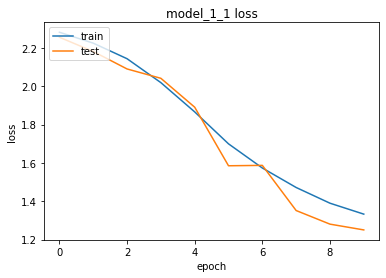

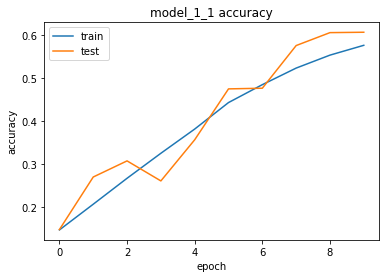

In [17]:
plt.plot(history_1_1.history['loss'])
plt.plot(history_1_1.history['val_loss'])
plt.title('model_1_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_1_1.history['accuracy'])
plt.plot(history_1_1.history['val_accuracy'])
plt.title('model_1_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
result_1_10 = model_1_1.evaluate(X_train, y_train, verbose=0)
result_1_11 = model_1_1.evaluate(X_val, y_val, verbose=0)
result_1_12 = model_1_1.evaluate(X_test, y_test, verbose=0)
print('Test_acc using Stochastic Gradient Descent: ', result_1_12[1])

# Save the accuracy for each model in dataframe
results = pd.DataFrame({'Model':['SGD'], 'accuracy_train': [result_1_10[1]], 'accuracy_val': [result_1_11[1]], 'accuracy_test': [result_1_12[1]],
                       'loss_train': [result_1_10[0]], 'loss_val': [result_1_11[0]], 'loss_test': [result_1_12[0]]})
results

Test_acc using Stochastic Gradient Descent:  0.6071666479110718


,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.6091,0.607167,1.242612,1.244938,1.250363


### 5. Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

In [19]:
# Initialize the Artificial Neural Network Classifier with Adam
model_1_2 = Sequential()

# Adding Input layer and activation functions ReLU
model_1_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_1_2.add(Activation('relu'))

# Hidden Layer 1
model_1_2.add(Dense(256, kernel_initializer='he_normal'))
model_1_2.add(Activation('relu'))

# Hidden Layer 2
model_1_2.add(Dense(128, kernel_initializer='he_normal'))
model_1_2.add(Activation('relu'))

# Hidden Layer 3
model_1_2.add(Dense(64, kernel_initializer='he_normal'))
model_1_2.add(Activation('relu'))

# Hidden Layer 4
model_1_2.add(Dense(32, kernel_initializer='he_normal'))
model_1_2.add(Activation('relu'))

# Output Layer
model_1_2.add(Dense(10))
model_1_2.add(Activation('softmax'))

In [20]:
model_1_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [21]:
# compiling the ANN classifier
model_1_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history_1_2 = model_1_2.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 3s 14ms/step - loss: 2.2848 - accuracy: 0.1272 - val_loss: 2.1970 - val_accuracy: 0.1625
Epoch 2/10
210/210 [==============================] - 3s 13ms/step - loss: 1.7807 - accuracy: 0.3632 - val_loss: 1.5050 - val_accuracy: 0.4869
Epoch 3/10
210/210 [==============================] - 3s 13ms/step - loss: 1.3191 - accuracy: 0.5668 - val_loss: 1.1827 - val_accuracy: 0.6284
Epoch 4/10
210/210 [==============================] - 3s 13ms/step - loss: 1.1412 - accuracy: 0.6370 - val_loss: 1.0984 - val_accuracy: 0.6531
Epoch 5/10
210/210 [==============================] - 3s 14ms/step - loss: 1.0357 - accuracy: 0.6744 - val_loss: 0.9696 - val_accuracy: 0.6977
Epoch 6/10
210/210 [==============================] - 3s 13ms/step - loss: 0.9727 - accuracy: 0.6957 - val_loss: 1.0289 - val_accuracy: 0.6819
Epoch 7/10
210/210 [==============================] - 3s 13ms/step - loss: 0.9122 - accuracy: 0.7153 - val_loss: 0.9440 - val_accuracy: 0.7083

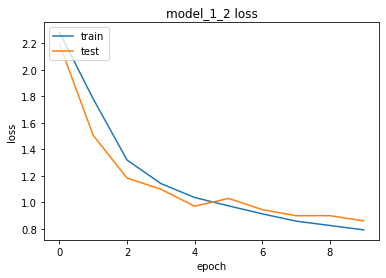

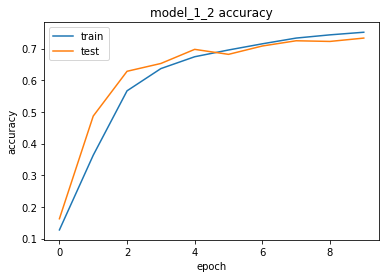

In [23]:
plt.plot(history_1_2.history['loss'])
plt.plot(history_1_2.history['val_loss'])
plt.title('model_1_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_1_2.history['accuracy'])
plt.plot(history_1_2.history['val_accuracy'])
plt.title('model_1_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
result_1_20 = model_1_2.evaluate(X_test, y_test, verbose=0)
result_1_21 = model_1_2.evaluate(X_val, y_val, verbose=0)
result_1_22 = model_1_2.evaluate(X_test, y_test, verbose=0)
print('Test_acc using Adam: ', result_1_22[1])

temp = {'Model':'Adam', 'accuracy_train': result_1_20[1], 'accuracy_val': result_1_21[1], 'accuracy_test': result_1_22[1],
       'loss_train': result_1_20[0], 'loss_val': result_1_21[0], 'loss_test': result_1_22[0]}
results = results.append(temp, ignore_index=True)
results

Test_acc using Adam:  0.7333333492279053


,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.6091,0.607167,1.242612,1.244938,1.250363
1,Adam,0.733333,0.7443,0.733333,0.858559,0.808561,0.858559


In [82]:
# Initialize the Artificial Neural Network Classifier
model_1_3 = Sequential()

# Adding Input layer and activation functions ReLU
model_1_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model_1_3.add(Activation('relu'))

# Hidden Layer 1
model_1_3.add(Dense(256, kernel_initializer='he_normal'))
model_1_3.add(Activation('relu'))

# Hidden Layer 2
model_1_3.add(Dense(128, kernel_initializer='he_normal'))
model_1_3.add(Activation('relu'))

# Hidden Layer 3
model_1_3.add(Dense(64, kernel_initializer='he_normal'))
model_1_3.add(Activation('relu'))

#Hidden Layer 4
model_1_3.add(Dense(32, kernel_initializer='he_normal'))
model_1_3.add(Activation('relu'))

# Output Layer
model_1_3.add(Dense(10))
model_1_3.add(Activation('softmax'))

In [31]:
model_1_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)               

In [83]:
#Setting the learning rate
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
model_1_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_1_3 = model_1_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 200, verbose = 1)

Epoch 1/200
210/210 [==============================] - 7s 27ms/step - loss: 2.2086 - accuracy: 0.2079 - val_loss: 2.0360 - val_accuracy: 0.3090
Epoch 2/200
210/210 [==============================] - 5s 24ms/step - loss: 1.8076 - accuracy: 0.4353 - val_loss: 1.6181 - val_accuracy: 0.5047
Epoch 3/200
210/210 [==============================] - 5s 25ms/step - loss: 1.4719 - accuracy: 0.5580 - val_loss: 1.3555 - val_accuracy: 0.5916
Epoch 4/200
210/210 [==============================] - 5s 24ms/step - loss: 1.2957 - accuracy: 0.6066 - val_loss: 1.2310 - val_accuracy: 0.6245
Epoch 5/200
210/210 [==============================] - 5s 23ms/step - loss: 1.1991 - accuracy: 0.6371 - val_loss: 1.1639 - val_accuracy: 0.6474
Epoch 6/200
210/210 [==============================] - 5s 23ms/step - loss: 1.1310 - accuracy: 0.6563 - val_loss: 1.1328 - val_accuracy: 0.6533
Epoch 7/200
210/210 [==============================] - 5s 24ms/step - loss: 1.0768 - accuracy: 0.6745 - val_loss: 1.0537 - val_accuracy:

210/210 [==============================] - 5s 23ms/step - loss: 0.4318 - accuracy: 0.8689 - val_loss: 0.4788 - val_accuracy: 0.8604
Epoch 58/200
210/210 [==============================] - 5s 23ms/step - loss: 0.4290 - accuracy: 0.8701 - val_loss: 0.4881 - val_accuracy: 0.8539
Epoch 59/200
210/210 [==============================] - 5s 23ms/step - loss: 0.4184 - accuracy: 0.8735 - val_loss: 0.4991 - val_accuracy: 0.8519
Epoch 60/200
210/210 [==============================] - 5s 23ms/step - loss: 0.4124 - accuracy: 0.8753 - val_loss: 0.4598 - val_accuracy: 0.8655
Epoch 61/200
210/210 [==============================] - 5s 23ms/step - loss: 0.4102 - accuracy: 0.8743 - val_loss: 0.4764 - val_accuracy: 0.8594
Epoch 62/200
210/210 [==============================] - 5s 23ms/step - loss: 0.4061 - accuracy: 0.8760 - val_loss: 0.4615 - val_accuracy: 0.8641
Epoch 63/200
210/210 [==============================] - 5s 23ms/step - loss: 0.3960 - accuracy: 0.8798 - val_loss: 0.4419 - val_accuracy: 0.872

210/210 [==============================] - 5s 23ms/step - loss: 0.2311 - accuracy: 0.9301 - val_loss: 0.3433 - val_accuracy: 0.9090
Epoch 114/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2267 - accuracy: 0.9317 - val_loss: 0.3643 - val_accuracy: 0.9025
Epoch 115/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2240 - accuracy: 0.9327 - val_loss: 0.3678 - val_accuracy: 0.8986
Epoch 116/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2204 - accuracy: 0.9326 - val_loss: 0.3622 - val_accuracy: 0.9022
Epoch 117/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2241 - accuracy: 0.9308 - val_loss: 0.3659 - val_accuracy: 0.9001
Epoch 118/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2138 - accuracy: 0.9361 - val_loss: 0.3538 - val_accuracy: 0.9066
Epoch 119/200
210/210 [==============================] - 5s 23ms/step - loss: 0.2114 - accuracy: 0.9363 - val_loss: 0.3258 - val_accuracy:

210/210 [==============================] - 5s 23ms/step - loss: 0.1207 - accuracy: 0.9625 - val_loss: 0.3422 - val_accuracy: 0.9211
Epoch 170/200
210/210 [==============================] - 5s 24ms/step - loss: 0.1272 - accuracy: 0.9612 - val_loss: 0.3182 - val_accuracy: 0.9296
Epoch 171/200
210/210 [==============================] - 5s 24ms/step - loss: 0.1253 - accuracy: 0.9611 - val_loss: 0.3243 - val_accuracy: 0.9273
Epoch 172/200
210/210 [==============================] - 5s 23ms/step - loss: 0.1218 - accuracy: 0.9624 - val_loss: 0.3256 - val_accuracy: 0.9275
Epoch 173/200
210/210 [==============================] - 5s 23ms/step - loss: 0.1200 - accuracy: 0.9632 - val_loss: 0.3103 - val_accuracy: 0.9326
Epoch 174/200
210/210 [==============================] - 5s 23ms/step - loss: 0.1109 - accuracy: 0.9663 - val_loss: 0.3275 - val_accuracy: 0.9269
Epoch 175/200
210/210 [==============================] - 5s 23ms/step - loss: 0.1164 - accuracy: 0.9649 - val_loss: 0.3221 - val_accuracy:

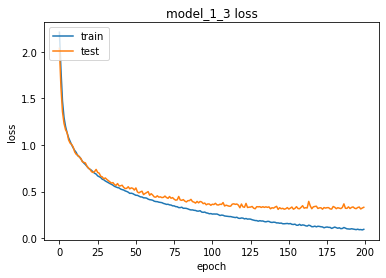

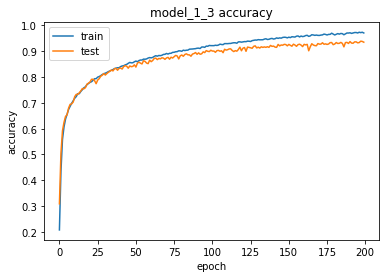

In [84]:
plt.plot(history_1_3.history['loss'])
plt.plot(history_1_3.history['val_loss'])
plt.title('model_1_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_1_3.history['accuracy'])
plt.plot(history_1_3.history['val_accuracy'])
plt.title('model_1_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
result_1_30 = model_1_3.evaluate(X_train, y_train, verbose=0)
result_1_31 = model_1_3.evaluate(X_val, y_val, verbose=0)
result_1_32 = model_1_3.evaluate(X_test, y_test, verbose=0)

print('Test_acc using Adam : ', result_1_32[1])

temp = {'Model':'Adam (lr=0.0001)', 'accuracy_train': result_1_30[1], 'accuracy_val': result_1_31[1], 'accuracy_test': result_1_32[1],
       'loss_train': result_1_30[0], 'loss_val': result_1_31[0], 'loss_test': result_1_32[0]}
results = results.append(temp, ignore_index=True)
results

Test_acc using Adam :  0.8383333086967468


,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.609100,0.607167,1.242612,1.244938,1.250363
1,Adam,0.733333,0.744300,0.733333,0.858559,0.808561,0.858559
2,Adam (lr=0.001)+Batch+Dropout,0.930786,0.908217,0.855556,0.237231,0.313794,0.492440
3,Adam (lr=0.0001),0.976214,0.934850,0.838333,0.080856,0.330668,0.913561


In [77]:
model_3 = Sequential()

# Input Layer
model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))

model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))

#Hidden Layer 1
model_3.add(Dense(256,kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))

#Hidden Layer 2
model_3.add(Dense(128, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))

#Hidden Layer 3
model_3.add(Dense(64, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))

#Hidden Layer 4
model_3.add(Dense(32, kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))

# Output Layer
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

In [78]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_48 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_49 (Activation)   (None, 256)              

In [85]:
# Adam optimizer
adam = optimizers.Adam(lr = 0.001)
model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history_1_4 = model_3.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size= 128, epochs = 200, verbose = 1)

Epoch 1/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5182 - accuracy: 0.8502 - val_loss: 0.6252 - val_accuracy: 0.8127
Epoch 2/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5170 - accuracy: 0.8493 - val_loss: 0.7022 - val_accuracy: 0.7843
Epoch 3/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5083 - accuracy: 0.8523 - val_loss: 0.8364 - val_accuracy: 0.7261
Epoch 4/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5067 - accuracy: 0.8528 - val_loss: 0.7503 - val_accuracy: 0.7701
Epoch 5/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5083 - accuracy: 0.8526 - val_loss: 0.7265 - val_accuracy: 0.7733
Epoch 6/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5154 - accuracy: 0.8496 - val_loss: 0.6276 - val_accuracy: 0.8101
Epoch 7/200
329/329 [==============================] - 7s 20ms/step - loss: 0.5068 - accuracy: 0.8527 - val_loss: 0.6536 - val_accuracy:

KeyboardInterrupt: 

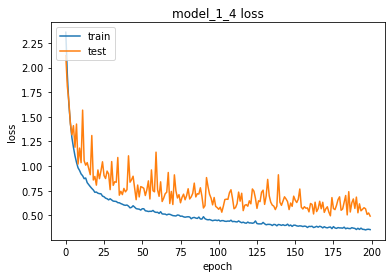

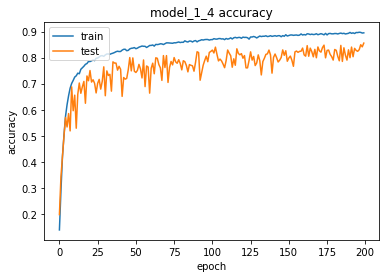

In [47]:
plt.plot(history_1_4.history['loss'])
plt.plot(history_1_4.history['val_loss'])
plt.title('model_1_4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_1_4.history['accuracy'])
plt.plot(history_1_4.history['val_accuracy'])
plt.title('model_1_4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
result_1_40 = model_3.evaluate(X_train, y_train, verbose=0)
result_1_41 = model_3.evaluate(X_val, y_val, verbose=0)
result_1_42 = model_3.evaluate(X_test, y_test, verbose=0)

print('Test_acc using Batch+Dropout Adam: ', result_1_42[1])

temp = {'Model':'Adam (lr=0.001)+Batch+Dropout', 'accuracy_train': result_1_40[1], 'accuracy_val': result_1_41[1], 'accuracy_test': result_1_42[1],
       'loss_train': result_1_40[0], 'loss_val': result_1_41[0], 'loss_test': result_1_42[0]}
results = results.append(temp, ignore_index=True)
results

Test_acc using Batch+Dropout Adam:  0.855555534362793


,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.609100,0.607167,1.242612,1.244938,1.250363
1,Adam,0.733333,0.744300,0.733333,0.858559,0.808561,0.858559
2,Adam (lr=0.0001),0.926357,0.899083,0.835444,0.252286,0.365369,0.629230
3,Adam (lr=0.001)+Batch+Dropout,0.930786,0.908217,0.855556,0.237231,0.313794,0.492440


### 6. Fit and evaluate the model. Print the loss and accuracy for the test data

In [96]:
results

,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.609100,0.607167,1.242612,1.244938,1.250363
1,Adam,0.733333,0.744300,0.733333,0.858559,0.808561,0.858559
3,Adam (lr=0.0001),0.976214,0.934850,0.838333,0.080856,0.330668,0.913561
2,Adam (lr=0.001)+Batch+Dropout,0.930786,0.908217,0.855556,0.237231,0.313794,0.492440


In [95]:
results = results.sort_values('accuracy_test')

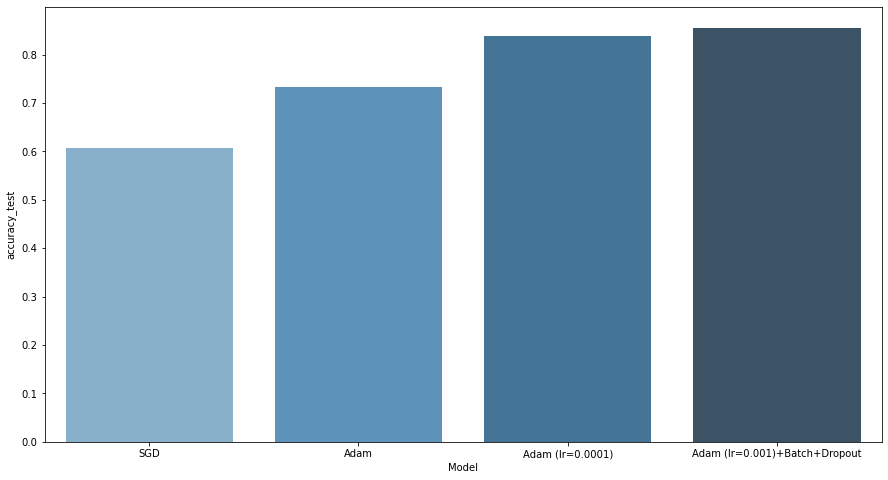

In [97]:
plt.figure(figsize=(15,8))
ax = sns.barplot( x="Model", y="accuracy_test",data=results, palette="Blues_d")


### 7. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [98]:
results

,Model,accuracy_train,accuracy_val,accuracy_test,loss_train,loss_val,loss_test
0,SGD,0.609929,0.609100,0.607167,1.242612,1.244938,1.250363
1,Adam,0.733333,0.744300,0.733333,0.858559,0.808561,0.858559
3,Adam (lr=0.0001),0.976214,0.934850,0.838333,0.080856,0.330668,0.913561
2,Adam (lr=0.001)+Batch+Dropout,0.930786,0.908217,0.855556,0.237231,0.313794,0.492440


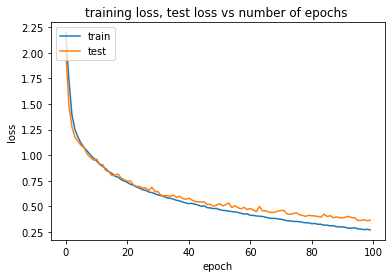

In [75]:
# Plot the training loss, test loss vs number of epochs 
plt.plot(history_1_3.history['loss'])
plt.plot(history_1_3.history['val_loss'])
plt.title('training loss, test loss vs number of epochs ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


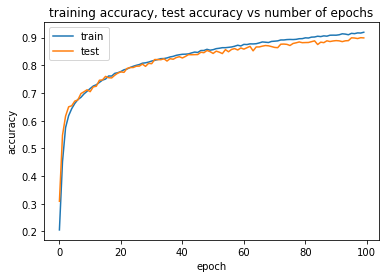

In [76]:

# Plot the training accuracy, test accuracy vs number of epochs 
plt.plot(history_1_3.history['accuracy'])
plt.plot(history_1_3.history['val_accuracy'])
plt.title('training accuracy, test accuracy vs number of epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()